### Online Machine Learning Feature Selection Experiments

Jay Urbain, PhD

#### Description

Feature selection can have a significant impact on building effective machine learning models. Irrelevant or partially relevant features can negatively impact model performance.

This script experiments with automatic feature selection techniques available in the Python scikit-learn machine learning package.

#### Feature selection

Feature selection is a process for selecting features in your data that collectively contribute the most to identifying a prediction varaible. Irrelevant features can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data include:

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise. 
- Improves Accuracy: Less misleading data means modeling accuracy improves. 
- Reduces Training Time: Less data means that algorithms train faster.

#### Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

$\chi ^2$ Feature selection

In statistics, the $\chi ^2$ test is applied to test the independence of two events, where two events A and B are defined to be independent if $P(AB) = P(A)P(B)$ or, equivalently,  $P(A\vert B)=P(A)$ and $P(B\vert A)=P(B)$. In feature selection, the two events are occurrence of the event and occurrence of the class. 

$\chi^2 statistic = \sum_i{\frac{(O_i-E_i)^2}{E_i} }$

The $\chi^2$ critical value is looked up in a table based on the number of degrees of freedom (n-1) and the level of uncertainty required to reject the null hypothesis. If the statistic is greater than the critical value, it is less likely to occur by chance, the null hypothesis is rejected, and the result is less likely to be explained by chance.

*SelectKBest* can be used with different statistical tests to select the K-best (most significant) features with respect to the classification.

The example below uses the chi-squared statistical test for non-negative features to select $4$ of the best features from the *Pima Indians onset of diabetes dataset*. The Chi-squared distribution is constructed from the sum of sqaured errors.

In [6]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

import numpy as np
import pandas as pd
import glob
import re
import csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
print 'Pima indians diabetes dataset'
print 'Data: '
print X[:2]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)
print 'Feature names: ', names
print('fit.scores_ best 4 of 8: ', fit.scores_)
X_new = fit.transform(X)
print 'Transformed data: ', X_new[:2]
print 

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X, y = iris.data, iris.target
print 'Iris dataset'
print 'iris.feature_names: ', iris.feature_names
print 'X.shape: ', X.shape
print 'Data: ', X[:2]

# select top 2 features by chi^2
skb = SelectKBest(chi2, k=2)
X_new = skb.fit_transform(X, y)
print 'selected features: ', skb.get_support()
print X_new[:5]
print X_new.shape
print 'Transformed data: '
print X[:2]
#(150, 2)


Pima indians diabetes dataset
Data: 
[[   6.     148.      72.      35.       0.      33.6      0.627   50.   ]
 [   1.      85.      66.      29.       0.      26.6      0.351   31.   ]]
Feature names:  ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
('fit.scores_ best 4 of 8: ', array([  111.52 ,  1411.887,    17.605,    53.108,  2175.565,   127.669,
           5.393,   181.304]))
Transformed data:  [[ 148.     0.    33.6   50. ]
 [  85.     0.    26.6   31. ]]

Iris dataset
iris.feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X.shape:  (150, 4)
Data:  [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]
selected features:  [False False  True  True]
[[ 1.4  0.2]
 [ 1.4  0.2]
 [ 1.3  0.2]
 [ 1.5  0.2]
 [ 1.4  0.2]]
(150, 2)
Transformed data: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]]


#### Select kbest using LogisticRegression classifier weights

In [7]:
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif

iris = load_iris()
X, y = iris.data, iris.target
lr = LogisticRegression()
lr.fit(X,y)
print 'Logistic Regression sans feature selection, parameter optimization: ', lr.score(X,y)
kbest = SelectKBest(f_classif)
pipeline = Pipeline([('kbest', kbest), ('lr', LogisticRegression())])
grid_search = GridSearchCV(pipeline, {'kbest__k': [1,2,3,4], 'lr__C': np.logspace(-10, 10, 5)})
grid_search.fit(X, y)

print 'Logistic Regression w/ feature selection, parameter optimization: ', grid_search.score(X, y)

Logistic Regression sans feature selection, parameter optimization:  0.96
Logistic Regression w/ feature selection, parameter optimization:  0.966666666667


#### Compare weights from univariate selection, SVM standard, and SVM selected

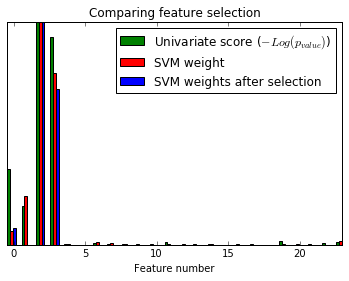

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# import iris dataset
iris = datasets.load_iris()

# Some noisy data, not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

plt.figure(1)
plt.clf()

X_indices = np.arange(X.shape[-1])

# Univariate feature selection with F1-test for feature scoring
# Use the default selection function: the 10% most significant features
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='g')

# Compare to the weights of an SVM
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

svm_weights = (clf.coef_ ** 2).sum(axis=0)
svm_weights /= svm_weights.max()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight', color='r')

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(selector.transform(X), y)

svm_weights_selected = (clf_selected.coef_ ** 2).sum(axis=0)
svm_weights_selected /= svm_weights_selected.max()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection', color='b')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

#### Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

The example below uses RFE with the logistic regression algorithm to select the top 3 features. 

In [9]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Featurenames: ", names)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

# You can see that RFE chose the the top 3 features as preg, pedi and age. These are marked True in the support_ array and marked with a choice “1” in the ranking_ array.

('Featurenames: ', ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


#### Principal Component Analysis

Principal Component Analysis (or PCA) uses linear algebra to transform the data into a lower dimensional space.

This is called a data reduction technique. A property of *PCA* is that you can choose the number of dimensions or principal component in the transformed result.

In the example below, we use PCA and select 3 principal components.

In [10]:
# Feature Extraction with PCA
import numpy as np
from pandas import read_csv
from sklearn.decomposition import PCA

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

print 'Original dataset: '
print X[:3]
print 

# summarize components
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

# The transformed dataset (3 principal components) bare little resemblance to the source data.

# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X)
X_new = pca.transform(X)
print 'Transformed dataset: '
print X_new[:3]

lr = LogisticRegression(C=0.9)
model = lr.fit(X, Y)
print 'LR without PCA features score: ', model.score(X, Y)
model = lr.fit(X_new, Y)
print 'LR with PCA features score: ', model.score(X_new, Y)


Original dataset: 
[[   6.     148.      72.      35.       0.      33.6      0.627   50.   ]
 [   1.      85.      66.      29.       0.      26.6      0.351   31.   ]
 [   8.     183.      64.       0.       0.      23.3      0.672   32.   ]]



AttributeError: 'RFE' object has no attribute 'explained_variance_ratio_'

#### Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

In the example below we construct a ExtraTreesClassifier classifier for the Pima Indians onset of diabetes dataset. You can learn more about the ExtraTreesClassifier class in the scikit-learn API.

In [11]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

# Importance score for each attribute where the larger score the more important the attribute. 
# The scores suggest at the importance of plas, age and mass.

[ 0.103  0.242  0.094  0.085  0.065  0.138  0.113  0.159]


#### Recursive Feature Elimination

The Recursive Feature Elimination (RFE) method is a feature selection approach. It works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
This recipe shows the use of RFE on the iris dataset to select 3 attributes.

In [12]:
#RecursiveFeatureElimination
from sklearn import datasets
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression 

#loadtheirisdatasets
dataset = datasets.load_iris() 

#createabaseclassifierusedtoevaluateasubsetofattributes 
model = LogisticRegression() 

#createtheRFEmodelandselect3attributes
rfe = RFE(model, 3)
rfe = rfe.fit(dataset.data, dataset.target) 

#summarizetheselectionoftheattributes
print(rfe.support_)
print(rfe.ranking_)


[False  True  True  True]
[2 1 1 1]


#### Load Honeywell data

In [13]:
import numpy as np
import pandas as pd
import glob
import re
import csv
from datetime import datetime
from dateutil.parser import parse
from sklearn import preprocessing

# define columns (not really needed, header included)
columns = [
'EQPID',
'EVENT',
'STATUS',
'START_DATE',
'FINISH_DATE',
'DOWN_DAYS',
'PRIORITY',
'TOTALHOURS',
'TECH_ASSOC',
'AS_FOUND_CONDITION',
'AS_LEFT_CONDITION',
'EQTYPE',
'DOB',
'CURAGE',
'N_TESTS',
'initEvent',
'prevEvent',
'deltaEvent',
'rateEvent',
'countEvent',
'initCollectData',
'prevCollectData',
'deltaCollectData',
'rateCollectData',
'countCollectData',
'initCalibration',
'prevCalibration',
'deltaCalibration',
'rateCalibration',
'countCalibration',
'initRemoveFromService',
'prevRemoveFromService',
'deltaRemoveFromService',
'rateRemoveFromService',
'countRemoveFromService',
'initReturnToService',
'prevReturnToService',
'deltaReturnToService',
'rateReturnToService',
'countReturnToService',
'initSafetyApproval',
'prevSafetyApproval',
'deltaSafetyApproval',
'rateSafetyApproval',
'countSafetyApproval',
'maxDownDays',
'avgDownDays',
'maxTotalHours',
'avgTotalHours',
'maxNTests',
'avgNTests',
'removeFromService30d',
'removeFromService60d',
'returnToService30d',
'returnToService60d',
'calibration30d',
'calibration60d',
'maintenanceRequest30d',
'maintenanceRequest60d',
'totalHours30d',
'totalHours60d',
'downDays30d',
'downDays60d',
'nTests30d',
'nTests60d']

#print columns

# load data file
url = "/Users/jayurbain/Honeywell/cms_cal_sr_comp_time_norm_tests_label.csv"
df = pd.read_csv(url, index_col=None)
# 4116

# print df.avgNTests.describe()

# ensure proper datatypes
df.EQPID.astype('str')
df.EVENT.astype('str')
df.STATUS.astype('str')
df.START_DATE.astype('datetime64')
df.FINISH_DATE.astype('datetime64')
df.DOWN_DAYS.astype('int64')
df.PRIORITY.astype('str')
df.TOTALHOURS.astype('float64')
df.TECH_ASSOC.astype('str')
df.AS_FOUND_CONDITION.astype('str')
df.AS_LEFT_CONDITION.astype('str')
df.EQTYPE.astype('str')
df.DOB.astype('datetime64')
df.CURAGE.astype('float64')
df.N_TESTS.astype('float64')
df.initEvent.astype('datetime64')
df.prevEvent.astype('datetime64')
df.deltaEvent.astype('float64')
df.rateEvent.astype('float64')
df.countEvent.astype('float64')
df.initCollectData.astype('datetime64')
df.prevCollectData.astype('datetime64')
df.deltaCollectData.astype('float64')
df.rateCollectData.astype('float64')
df.countCollectData.astype('float64')
df.initCalibration.astype('datetime64')
df.prevCalibration.astype('datetime64')
df.deltaCalibration.astype('float64')
df.rateCalibration.astype('float64')
df.countCalibration.astype('float64')
df.initRemoveFromService.astype('datetime64')
df.prevRemoveFromService.astype('datetime64')
df.deltaRemoveFromService.astype('float64')
df.rateRemoveFromService.astype('float64')
df.countRemoveFromService.astype('float64')
df.initReturnToService.astype('datetime64')
df.prevReturnToService.astype('datetime64')
df.deltaReturnToService.astype('float64')
df.rateReturnToService.astype('float64')
df.countReturnToService.astype('float64')
df.initSafetyApproval.astype('datetime64')
df.prevSafetyApproval.astype('datetime64')
df.deltaSafetyApproval.astype('float64')
df.rateSafetyApproval.astype('float64')
df.countSafetyApproval.astype('float64')
df.maxDownDays.astype('float64')
df.avgDownDays.astype('float64')
df.maxTotalHours.astype('float64')
df.avgTotalHours.astype('float64')
df.maxNTests.astype('float64')
df.avgNTests.astype('float64')
df.removeFromService30d.astype('bool_')
df.removeFromService60d.astype('bool_')
df.returnToService30d.astype('bool_')
df.returnToService60d.astype('bool_')
df.calibration30d.astype('bool_')
df.calibration60d.astype('bool_')
df.maintenanceRequest30d.astype('bool_')
df.maintenanceRequest60d.astype('bool_')
df.totalHours30d.astype('bool_')
df.totalHours60d.astype('bool_')
df.downDays30d.astype('bool_')
df.downDays60d.astype('bool_')
df.nTests30d.astype('bool_')

df[:10]


,EQPID,EVENT,STATUS,START_DATE,FINISH_DATE,DOWN_DAYS,PRIORITY,TOTALHOURS,TECH_ASSOC,AS_FOUND_CONDITION,...,calibration30d,calibration60d,maintenanceRequest30d,maintenanceRequest60d,totalHours30d,totalHours60d,downDays30d,downDays60d,nTests30d,nTests60d
0,OEPPXQEVRA,Calibration,Completed,2000-11-02,2000-11-02,1,Normal,3,27340,SJJZZIKKBY,...,True,True,False,False,False,False,False,False,False,False
1,OEPPXQEVRA,Calibration,Completed,2000-11-03,2000-11-09,6,Low,6,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
2,OEPPXQEVRA,Calibration,Completed,2001-01-22,2001-02-21,30,Low,4,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
3,OEPPXQEVRA,Calibration,Completed,2001-05-07,2001-06-01,25,Low,4,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
4,OEPPXQEVRA,Calibration,Completed,2001-08-13,2001-09-04,22,Low,5,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
5,OEPPXQEVRA,Calibration,Completed,2001-11-19,2001-12-05,16,Low,8,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
6,OEPPXQEVRA,Calibration,Completed,2002-02-18,2002-03-15,25,Hot,12,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
7,OEPPXQEVRA,Calibration,Completed,2002-05-28,2002-06-10,13,Hot,8,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
8,OEPPXQEVRA,Calibration,Completed,2002-08-26,2002-09-09,14,Hot,10,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
9,OEPPXQEVRA,Calibration,Completed,2002-11-25,2002-12-09,14,Hot,12,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False


#### Select features for machine learning

In [14]:
column_features = ['EQPID', 'EVENT', 'STATUS', 'DOWN_DAYS', 'PRIORITY', 'TOTALHOURS', 'TECH_ASSOC', 'AS_FOUND_CONDITION', 'AS_LEFT_CONDITION', 'EQTYPE', 'CURAGE', 'N_TESTS', 
                    'initEvent', 'prevEvent', 'deltaEvent', 'rateEvent', 'countEvent',
                    'deltaCollectData', 'rateCollectData', 'countCollectData',
                    'deltaCalibration', 'rateCalibration', 'countCalibration',
                    'deltaRemoveFromService', 'rateRemoveFromService', 'countRemoveFromService',
                    'deltaReturnToService', 'rateReturnToService', 'countReturnToService',
                    'deltaSafetyApproval', 'rateSafetyApproval', 'countSafetyApproval',
                    'maxDownDays', 'avgDownDays', 'maxTotalHours', 'avgTotalHours', 'maxNTests', 'avgNTests',
                    'removeFromService30d', 'removeFromService60d',
                    'returnToService30d', 'returnToService60d',
                    'calibration30d', 'calibration60d',
                    'maintenanceRequest30d', 'maintenanceRequest60d',
                    'totalHours30d', 'totalHours60d',
                    'downDays30d','downDays60d',
                    'nTests30d','nTests60d']

df_ = df[:][column_features]
df_[:5]


,EQPID,EVENT,STATUS,DOWN_DAYS,PRIORITY,TOTALHOURS,TECH_ASSOC,AS_FOUND_CONDITION,AS_LEFT_CONDITION,EQTYPE,...,calibration30d,calibration60d,maintenanceRequest30d,maintenanceRequest60d,totalHours30d,totalHours60d,downDays30d,downDays60d,nTests30d,nTests60d
0,OEPPXQEVRA,Calibration,Completed,1,Normal,3,27340,SJJZZIKKBY,SJJZZIKKBY,2,...,True,True,False,False,False,False,False,False,False,False
1,OEPPXQEVRA,Calibration,Completed,6,Low,6,26687,SJJZZIKKBY,SJJZZIKKBY,2,...,False,False,False,False,False,False,False,False,False,False
2,OEPPXQEVRA,Calibration,Completed,30,Low,4,26687,SJJZZIKKBY,SJJZZIKKBY,2,...,False,False,False,False,False,False,False,False,False,False
3,OEPPXQEVRA,Calibration,Completed,25,Low,4,26687,SJJZZIKKBY,SJJZZIKKBY,2,...,False,False,False,False,False,False,False,False,False,False
4,OEPPXQEVRA,Calibration,Completed,22,Low,5,26687,SJJZZIKKBY,SJJZZIKKBY,2,...,False,False,False,False,False,False,False,False,False,False


#### Define X, y

In [15]:

X_features = ['EQPID', 'EVENT', 'STATUS', 'DOWN_DAYS', 'PRIORITY', 'TOTALHOURS', 'TECH_ASSOC', 'AS_FOUND_CONDITION', 'AS_LEFT_CONDITION', 'EQTYPE', 'CURAGE', 'N_TESTS', 
                    'deltaEvent', 'rateEvent', 'countEvent',
                    'deltaCollectData', 'rateCollectData', 'countCollectData',
                    'deltaCalibration', 'rateCalibration', 'countCalibration',
                    'deltaRemoveFromService', 'rateRemoveFromService', 'countRemoveFromService',
                    'deltaReturnToService', 'rateReturnToService', 'countReturnToService',
                    'deltaSafetyApproval', 'rateSafetyApproval', 'countSafetyApproval',
                    'maxDownDays', 'avgDownDays', 'maxTotalHours', 'avgTotalHours', 'maxNTests', 'avgNTests']

Y_labels = ['removeFromService30d', 'removeFromService60d',
                    'returnToService30d', 'returnToService60d',
                    'calibration30d', 'calibration60d',
                    'maintenanceRequest30d', 'maintenanceRequest60d',
                    'totalHours30d', 'totalHours60d',
                    'downDays30d','downDays60d',
                    'nTests30d','nTests60d']

df[:10]

,EQPID,EVENT,STATUS,START_DATE,FINISH_DATE,DOWN_DAYS,PRIORITY,TOTALHOURS,TECH_ASSOC,AS_FOUND_CONDITION,...,calibration30d,calibration60d,maintenanceRequest30d,maintenanceRequest60d,totalHours30d,totalHours60d,downDays30d,downDays60d,nTests30d,nTests60d
0,OEPPXQEVRA,Calibration,Completed,2000-11-02,2000-11-02,1,Normal,3,27340,SJJZZIKKBY,...,True,True,False,False,False,False,False,False,False,False
1,OEPPXQEVRA,Calibration,Completed,2000-11-03,2000-11-09,6,Low,6,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
2,OEPPXQEVRA,Calibration,Completed,2001-01-22,2001-02-21,30,Low,4,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
3,OEPPXQEVRA,Calibration,Completed,2001-05-07,2001-06-01,25,Low,4,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
4,OEPPXQEVRA,Calibration,Completed,2001-08-13,2001-09-04,22,Low,5,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
5,OEPPXQEVRA,Calibration,Completed,2001-11-19,2001-12-05,16,Low,8,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
6,OEPPXQEVRA,Calibration,Completed,2002-02-18,2002-03-15,25,Hot,12,26687,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
7,OEPPXQEVRA,Calibration,Completed,2002-05-28,2002-06-10,13,Hot,8,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
8,OEPPXQEVRA,Calibration,Completed,2002-08-26,2002-09-09,14,Hot,10,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False
9,OEPPXQEVRA,Calibration,Completed,2002-11-25,2002-12-09,14,Hot,12,27920,SJJZZIKKBY,...,False,False,False,False,False,False,False,False,False,False


#### Preporcessing

- Select X features, y classification column 
- Also set categorical values to numeric  
- Normalize values using Z-score normalization 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, svm
from sklearn.feature_selection import SelectPercentile, f_classif

# select X features and y classification column
X = df_[:][X_features]
y = df_[:]['calibration60d']

# X_features = ['EQPID', 'EVENT', 'STATUS', 'DOWN_DAYS', 'PRIORITY', 'TOTALHOURS', 'TECH_ASSOC', 'AS_FOUND_CONDITION', 'AS_LEFT_CONDITION', 'EQTYPE', 'CURAGE', 'N_TESTS', 
# EQPID
le = preprocessing.LabelEncoder()
le.fit(X.EQPID)
# print (le.classes_)
X.EQPID = le.transform(X.EQPID)

# EVENT
le = preprocessing.LabelEncoder()
le.fit(X.EVENT)
# print (le.classes_)
X.EVENT = le.transform(X.EVENT)

# STATUS
le = preprocessing.LabelEncoder()
le.fit(X.STATUS)
# print (le.classes_)
X.STATUS = le.transform(X.STATUS)

X.DOWN_DAYS = preprocessing.scale(X.DOWN_DAYS)

# PRIORITY
le = preprocessing.LabelEncoder()
le.fit(X.PRIORITY)
# print (le.classes_)
X.PRIORITY = le.transform(X.PRIORITY)

X.TOTALHOURS = preprocessing.scale(X.TOTALHOURS)

# TECH_ASSOC
le = preprocessing.LabelEncoder()
le.fit(X.TECH_ASSOC)
# print (le.classes_)
X.TECH_ASSOC = le.transform(X.TECH_ASSOC)

# AS_FOUND_CONDITION
# le = preprocessing.LabelEncoder()
le.fit(X.AS_FOUND_CONDITION)
# print (le.classes_)
X.AS_FOUND_CONDITION = le.transform(X.AS_FOUND_CONDITION)

# AS_LEFT_CONDITION
le = preprocessing.LabelEncoder()
le.fit(X.AS_LEFT_CONDITION)
# print (le.classes_)
X.AS_LEFT_CONDITION = le.transform(X.AS_LEFT_CONDITION)

# EQPTYPE
le = preprocessing.LabelEncoder()
le.fit(X.EQTYPE)
# print (le.classes_)
X.EQTYPE = le.transform(X.EQTYPE)

X.CURAGE = preprocessing.scale(X.CURAGE)
X.N_TESTS = preprocessing.scale(X.N_TESTS)

'''                    
'deltaEvent', 'rateEvent', 'countEvent',
'deltaCollectData', 'rateCollectData', 'countCollectData',
'deltaCalibration', 'rateCalibration', 'countCalibration',
'deltaRemoveFromService', 'rateRemoveFromService', 'countRemoveFromService',
'deltaReturnToService', 'rateReturnToService', 'countReturnToService',
'deltaSafetyApproval', 'rateSafetyApproval', 'countSafetyApproval',
'maxDownDays', 'avgDownDays', 'maxTotalHours', 'avgTotalHours', 'maxNTests', 'avgNTests'         
''' 

X.deltaEvent = preprocessing.scale(X.deltaEvent)
X.rateEvent = preprocessing.scale(X.rateEvent)
X.countEvent = preprocessing.scale(X.countEvent)
X.deltaCollectData = preprocessing.scale(X.deltaCollectData)
X.rateCollectData = preprocessing.scale(X.rateCollectData)
X.countCollectData = preprocessing.scale(X.countCollectData)
X.deltaCalibration = preprocessing.scale(X.deltaCalibration)
X.rateCalibration = preprocessing.scale(X.rateCalibration)
X.countCalibration = preprocessing.scale(X.countCalibration)
X.deltaRemoveFromService = preprocessing.scale(X.deltaRemoveFromService)
X.rateRemoveFromService = preprocessing.scale(X.rateRemoveFromService)
X.countRemoveFromService = preprocessing.scale(X.countRemoveFromService)
X.deltaReturnToService = preprocessing.scale(X.deltaReturnToService)
X.rateReturnToService = preprocessing.scale(X.rateReturnToService)
X.countReturnToService = preprocessing.scale(X.countReturnToService)
X.deltaSafetyApproval = preprocessing.scale(X.deltaSafetyApproval)
X.rateSafetyApproval = preprocessing.scale(X.rateSafetyApproval)
X.countSafetyApproval = preprocessing.scale(X.countSafetyApproval)
X.maxDownDays = preprocessing.scale(X.maxDownDays)
X.avgDownDays = preprocessing.scale(X.avgDownDays)
X.maxTotalHours = preprocessing.scale(X.maxTotalHours)
X.avgTotalHours = preprocessing.scale(X.avgTotalHours)
X.maxNTests = preprocessing.scale(X.maxNTests)
X.avgNTests = preprocessing.scale(X.avgNTests)    

# y
le = preprocessing.LabelEncoder()
le.fit(y)
# print (le.classes_)
y = le.transform(y)

print X[:10]
print y[:10]

lr = LogisticRegression()
model = lr.fit(X, y)
coefficients = lr.coef_[0]
intercept = lr.intercept_[0]
print 'intercept: ', intercept, 'coefficients: ', coefficients

print 'Logistic Regression model prediction: ', model.predict(X[:10])

print 'Logistic Regression model no feature selection score: ', model.score(X, y)

from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X, y)

print 'SVM prediction: ', svc.predict(X[:10])
print 'SVM score: ', svc.score(X, y)

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

print 'X.shape: ' , X.shape
# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(svc, prefit=True)
X_new = model.transform(X)
print 'X_new.shape: ', X_new.shape

print 'Select from model (SVM) features: ', X.columns[model.get_support()]

svc.fit(X_new, y)
print 'Select from model (SVM) score: ', svc.score(X_new, y)

lr.fit(X_new, y)
print 'Select from model (Logistic Regression) score: ', lr.score(X_new, y)


   EQPID  EVENT  STATUS  DOWN_DAYS  PRIORITY  TOTALHOURS  TECH_ASSOC  \
0     16      0       0  -0.288009         2   -0.482485          13   
1     16      0       0  -0.146521         1   -0.006741           8   
2     16      0       0   0.532619         1   -0.323904           8   
3     16      0       0   0.391132         1   -0.323904           8   
4     16      0       0   0.306239         1   -0.165322           8   
5     16      0       0   0.136454         1    0.310421          17   
6     16      0       0   0.391132         0    0.944745           8   
7     16      0       0   0.051561         0    0.310421          17   
8     16      0       0   0.079859         0    0.627583          17   
9     16      0       0   0.079859         0    0.944745          17   

   AS_FOUND_CONDITION  AS_LEFT_CONDITION  EQTYPE    ...      \
0                   6                  4       1    ...       
1                   6                  4       1    ...       
2                 

#### Feature selection using trees

Fits randomized decision trees

In [17]:
# feature extraction
tree = ExtraTreesClassifier()
tree.fit(X, y)
print 'Data:', X[:5]

d = dict(zip(X.columns, tree.feature_importances_))
print 'tree.feature_importances:'
print d
print
print 'ExtraTreesClassifier model score: ', tree.score(X, y)

# [4115 rows x 36 columns]
X_train = X[:3000]
X_test = X[3000:4115]
y_train = y[:3000]
y_test = y[3000:4115]

X_train = X[:3000]
X_test = X[3000:3500]
y_train = y[:3000]
y_test = y[3000:3500]

tree.fit(X_train, y_train)
print 'ExtraTreesClassifier model score test: ', tree.score(X_test, y_test)

model = SelectFromModel(tree, prefit=True)
X_new = model.transform(X)
lr = LogisticRegression(C=0.9)
lr.fit(X_new, y)
print 'Logistic regression with ExtraTreesClassifier features score: ', lr.score(X_new, y)

model = SelectFromModel(tree, prefit=True)
X_new_train = model.transform(X_train)
X_new_test = model.transform(X_test)
lr = LogisticRegression(C=0.9)
lr.fit(X_new_train, y_train)
print 'X_new.shape: ', X_new.shape

print 'Logistic regression with ExtraTreesClassifier features score test: ', lr.score(X_new_test, y_test)

# Is the beta_1 value associated with balance significant?
# B1 = balance.coef_[0][0]
# B0 = balance.intercept_[0]
# print 'B1: ', B1, ' B0: ', B0 
# print 'e^B1: ', np.exp(B1)

Data:    EQPID  EVENT  STATUS  DOWN_DAYS  PRIORITY  TOTALHOURS  TECH_ASSOC  \
0     16      0       0  -0.288009         2   -0.482485          13   
1     16      0       0  -0.146521         1   -0.006741           8   
2     16      0       0   0.532619         1   -0.323904           8   
3     16      0       0   0.391132         1   -0.323904           8   
4     16      0       0   0.306239         1   -0.165322           8   

   AS_FOUND_CONDITION  AS_LEFT_CONDITION  EQTYPE    ...      \
0                   6                  4       1    ...       
1                   6                  4       1    ...       
2                   6                  4       1    ...       
3                   6                  4       1    ...       
4                   6                  4       1    ...       

   countReturnToService  deltaSafetyApproval  rateSafetyApproval  \
0             -0.775793                    0           -0.850411   
1             -0.775793                    0  

#### Evaluate classifications

In [21]:
from sklearn import cross_validation

svc = svm.SVC(kernel='linear')
lr = LogisticRegression(C=0.9)
tree = ExtraTreesClassifier()

X_train = X[:3000]
X_test = X[3000:3500]

print 'X.shape: ' , X.shape

for label in Y_labels:
    
    y = df_[:][label]
    y_train = y[:3000]
    y_test = y[3000:3500]
    print '************************'
    print 'label: ', label
    y = df_[:][label]
    svc.fit(X_train, y_train)
#     scores = cross_validation.cross_val_score(clf, X[:3500], y[:3500], cv=5)
#     print("SVM score cv: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print 'SVM score train: ', svc.score(X_train, y_train)
    print 'SVM score test: ', svc.score(X_test, y_test)
    tree.fit(X_train, y_train)
#     scores = cross_validation.cross_val_score(tree, X[:3500], y[:3500], cv=5)
#     print("Randomized trees score cv: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print 'Randomized trees score train: ', tree.score(X_train, y_train)
    print 'Randomized trees score test: ', tree.score(X_test, y_test)
    lr.fit(X_train, y_train)
#     scores = cross_validation.cross_val_score(lr, X[:3500], y[:3500], cv=5)
#     print("LR score cv: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print 'LR score train: ', lr.score(X_train, y_train)
    print 'LR score test: ', lr.score(X_test, y_test)
    print
    
    model = SelectFromModel(svc, prefit=True)
    X_new_train = model.transform(X_train)
    X_new_test = model.transform(X_test)
    lr.fit(X_new_train, y_train)
    print 'SVM model features: ', X.columns[model.get_support()]
#     scores = cross_validation.cross_val_score(lr, X[:3500], y[:3500], cv=5)
#     print("LR score cv: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print 'Select from model (Logistic Regression) score train: ', lr.score(X_new_train, y_train)
    print 'Select from model (Logistic Regression) score test: ', lr.score(X_new_test, y_test)
    print
    d = dict(zip(X.columns, tree.feature_importances_))
    print 'tree.feature_importances:'
    print d
    print


X.shape:  (4115, 36)
************************
label:  removeFromService30d
SVM score train:  0.972
SVM score test:  0.988
Randomized trees score train:  1.0
Randomized trees score test:  0.988
LR score train:  0.973333333333
LR score test:  0.988

SVM model features:  Index([u'DOWN_DAYS', u'AS_FOUND_CONDITION', u'N_TESTS', u'rateEvent',
       u'countEvent', u'countCollectData', u'countCalibration',
       u'countReturnToService', u'rateSafetyApproval', u'countSafetyApproval',
       u'maxDownDays', u'maxNTests', u'avgNTests'],
      dtype='object')
Select from model (Logistic Regression) score train:  0.972
Select from model (Logistic Regression) score test:  0.988

tree.feature_importances:
{'TOTALHOURS': 0.045654723148923118, 'rateRemoveFromService': 0.0, 'countCollectData': 0.015177255877235818, 'maxTotalHours': 0.021738352339216883, 'AS_LEFT_CONDITION': 0.016570290864238495, 'avgTotalHours': 0.047620958804771976, 'countCalibration': 0.046453402085121748, 'EQTYPE': 0.01522969887440